# **회귀**

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

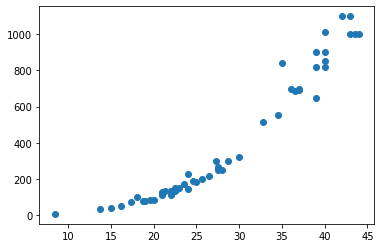

In [3]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)

In [4]:
# 농어의 길이가 커짐에 따라 무게도 늘어남

In [5]:
# 훈련 세트와 테스트 세트로 나누기

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [8]:
# 특성이 1개만 사용하므로 2차원 배열로 만들어줘야함 reshape()

In [9]:
test_array = np.array([1,2,3,4])
print(test_array.shape) 
# 배열 4개

(4,)


In [11]:
test_array = test_array.reshape(2, 2)
test_array.shape
# 2, 2의 크기로 변경

(2, 2)

In [12]:
# 위 처럼 변경해주기

In [13]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


**결정계수R^2**

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.9928094061010639


In [17]:
# 위 점수는 테스트 세트에 있는 샘플을 분류한 개수의 비율 (정확도)

In [20]:
from sklearn.metrics import  mean_absolute_error # 타깃과 예측의 절댓갑 오차를 평균으로 반환

# 테스트 세트에 대한 예측을 만듬
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [21]:
# 결과에서 예측이 평균적으로 19g 정도로 타깃값과 다름

# **과대적합 vs 과소적합**

In [22]:
print(knr.score(train_input, train_target))

0.9698823289099255


In [23]:
# 값이 다른 이유는 모델을 훈련 세트와 테스트 세트에서 평가하면 보통 훈련 세트의 점수가 더 높게 나옴
# 이유는 훈련 세트에서 훈련 했으므로..

# 훈련세트에서 점수가 좋았찌만 테스트 세트에서 점수가 나빳다면 모델이 훈련 세트에 과대적합 됨
# 반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우는 모델이 훈련 세트에 과소적합 되었다고 함

# 위의 훈련 세트와 테스트 세트의 점수가 높으니 과소적합임.
# 이를 해결하기 위해 모델을 더 복잡하게 만들면 됨

In [24]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [25]:
# k 값을 줄였더니 훈련 세트의 R^2의 점수가 높아짐

In [27]:
print(knr.score(test_input, test_target))

0.974645996398761


In [ ]:
# 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제 해결
# 또한 두 점수의 차이가 크지 않으므로 과대적홥 된 것 같지도 않음